**Title: Reaching a Goal (Qu)bit by (Qu)bit**

**Problem 0: The Classical Random Walk**

<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rishi\AppData\Local\Temp\ipykernel_30684\2797449226.py:37: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('RMS Displacement ($\sqrt{\\langle x^2 \\rangle}$)')


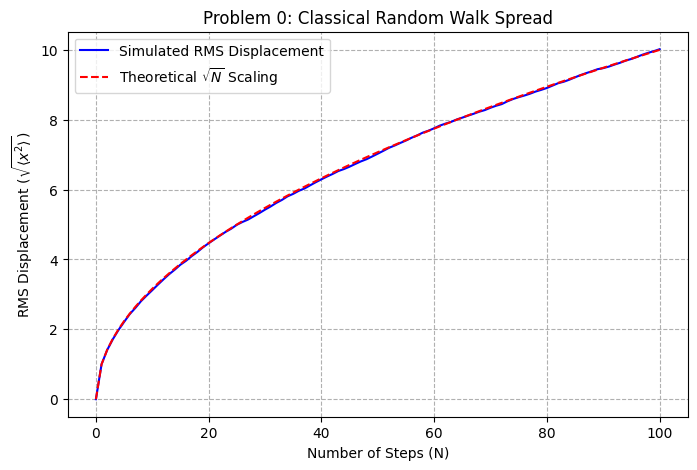

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def classical_random_Walk(N_max, N_walks):
    """
    Simulates N_walks instances of the classical random walk up to N_max steps 
    and computes the RMS displacement as a function of the number of steps (N).
    """
    
    # 1. Generate all steps for all walks
    steps = 2 * np.random.randint(0, 2, size=(N_walks, N_max)) - 1    
    
    # 2. Compute the position at each time step (cumulative sum)
    positions = np.zeros((N_walks, N_max + 1))
    positions[:, 1:] = np.cumsum(steps, axis=1)

    # 3. Compute Mean-Squared Displacement (MSD) over the ensemble
    msd = np.mean(positions**2, axis=0)
    
    # 4. Compute Root-Mean-Squared Displacement (RMS)
    rms_displacement = np.sqrt(msd)

    return rms_displacement

# Example execution (Plotting the result against the analytical solution)
N_steps = 100
N_simulations = 10000

rms_simulated = classical_random_Walk(N_steps, N_simulations)
time_steps = np.arange(N_steps + 1)

# Plotting the results (as required by the problem)
plt.figure(figsize=(8, 5))
plt.plot(time_steps, rms_simulated, label='Simulated RMS Displacement', color='blue')
plt.plot(time_steps, np.sqrt(time_steps), '--', label='Theoretical $\\sqrt{N}$ Scaling', color='red')
plt.xlabel('Number of Steps (N)')
plt.ylabel('RMS Displacement ($\sqrt{\\langle x^2 \\rangle}$)')
plt.title('Problem 0: Classical Random Walk Spread')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

**Problem 1: A Quantum coin flip**

In [29]:
def simulate_x_gate_walk(num_steps):
    position = 0
    coin_state = 0  # 0 represents |0>, 1 represents |1>
    path = [position]
    
    print(f"Step 0: Position={position}, Coin=|{coin_state}>")
    
    for t in range(1, num_steps + 1):
        
        # 1. Apply the X gate (Coin Operation)
        coin_state = 1 - coin_state
        
        # 2. Perform the Shift Operation
        if coin_state == 0:
            # Move left (x -> x-1)
            position = position -1
            direction = "Left"
        else: # coin_state == 1
            # Move right (x -> x+1)
            position = position +1
            direction = "Right"

        path.append(position)
        print(f"Step {t}: Coin=|{coin_state}>, Shift={direction}, Position={position}")

    return path

# Example Usage
N_steps = 5
simulate_x_gate_walk(N_steps)

Step 0: Position=0, Coin=|0>
Step 1: Coin=|1>, Shift=Right, Position=1
Step 2: Coin=|0>, Shift=Left, Position=0
Step 3: Coin=|1>, Shift=Right, Position=1
Step 4: Coin=|0>, Shift=Left, Position=0
Step 5: Coin=|1>, Shift=Right, Position=1


[0, 1, 0, 1, 0, 1]

**Problem 2: The Superposed Walker**

<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:87: SyntaxWarning: invalid escape sequence '\p'
<>:86: SyntaxWarning: invalid escape sequence '\p'
<>:87: SyntaxWarning: invalid escape sequence '\p'
C:\Users\rishi\AppData\Local\Temp\ipykernel_30684\1500156874.py:86: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(np.arange(T + 1), rms_q_walk, label='Quantum Walk RMS ($\propto t$)', color='purple')
C:\Users\rishi\AppData\Local\Temp\ipykernel_30684\1500156874.py:87: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(np.arange(T + 1), np.sqrt(np.arange(T + 1)), '--', label='Classical Walk RMS ($\propto \sqrt{t}$)', color='orange')


RMS after 50 steps: 27.0707


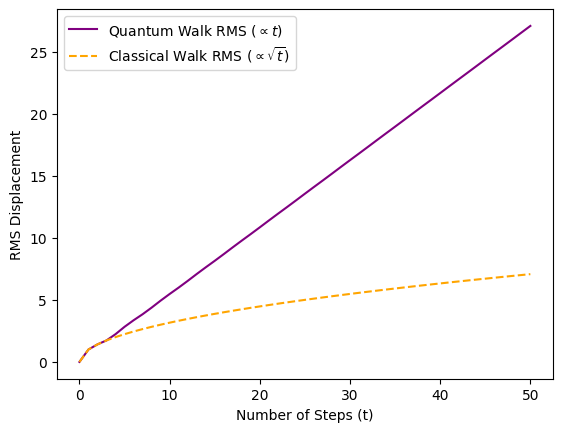

In [30]:
def compute_quantum_walk_rms(T_max):
    """
    Computes the RMS displacement of the 1D quantum walk 
    with a Hadamard coin up to T_max steps.
    """
    
    # --- 1. Dynamic Setup ---
    # The Hilbert space size must expand linearly with T_max
    POSITION_RANGE = 2 * T_max + 1
    HILBERT_DIM = POSITION_RANGE * 2
    START_INDEX = T_max
    
    # Initialize state vector |x=0>|0>
    current_state = np.zeros(HILBERT_DIM, dtype=complex)
    current_state[START_INDEX * 2] = 1.0 
    
    # Positions array (needed for the sum later)
    positions = np.arange(-T_max, T_max + 1)
    
    # Define Operators (Hadamard H, Shift S, Unitary U)
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
    
    # Construct the block-diagonal Coin Operator (C)
    C = np.zeros((HILBERT_DIM, HILBERT_DIM), dtype=complex)
    # ... loop to insert H into C ...
    
    for i in range(POSITION_RANGE):
        start_idx = i * 2
        end_idx = i * 2 + 2

        # Place the Hadamard matrix H into the 2x2 block for position 'i'   
        C[start_idx:end_idx, start_idx:end_idx] = H

    # Construct the conditional Shift Operator (S)
    S = np.zeros((HILBERT_DIM, HILBERT_DIM), dtype=complex)
    # ... loop to define S[target, current] = 1.0 ...
    for x_index in range(POSITION_RANGE):
        current_idx_0 = x_index * 2      # Coin state |0>
        current_idx_1 = x_index * 2 + 1  # Coin state |1>
        # Shift left for coin state |0>
        if x_index > 0 : # ENsure we don't go out of bounds
            target_idx_0 = (x_index - 1) *2
            S[target_idx_0, current_idx_0] = 1.0

        # Shift right for coin state |1>
        if x_index < POSITION_RANGE - 1: # Ensure we don't go out of bounds
            target_idx_1 = (x_index + 1) *2 + 1
            S[target_idx_1, current_idx_1] = 1.0

    # Combined Evolution Operator
    U = S @ C

    # Initialize array to store RMS at each time step
    rms_results = np.zeros(T_max + 1)
    
    # --- 2. Time Evolution and RMS Calculation ---
    for t in range(1, T_max + 1):
        # Apply the unitary operator U
        current_state = U @ current_state 
        
        # Calculate Position Probabilities P(x, t)
        position_probs = np.zeros(POSITION_RANGE)
        
        for x_index in range(POSITION_RANGE):
            idx_0 = x_index * 2
            idx_1 = x_index * 2 + 1
            
            # P(x) = |<x|0|Psi>|^2 + |<x|1|Psi>|^2
            prob_x = np.abs(current_state[idx_0])**2 + np.abs(current_state[idx_1])**2
            position_probs[x_index] = prob_x

        # 1. Calculate the Mean-Squared Displacement (MSD)
        # MSD = sum(x^2 * P(x)) 
        msd = np.sum(positions**2 * position_probs)
        
        # 2. Calculate the RMS
        rms_results[t] = np.sqrt(msd)

        
    return rms_results

# Example Usage (after filling in C and S):
T = 50
rms_q_walk = compute_quantum_walk_rms(T)
print(f"RMS after {T} steps: {rms_q_walk[T]:.4f}")
plt.plot(np.arange(T + 1), rms_q_walk, label='Quantum Walk RMS ($\propto t$)', color='purple')
plt.plot(np.arange(T + 1), np.sqrt(np.arange(T + 1)), '--', label='Classical Walk RMS ($\propto \sqrt{t}$)', color='orange')
plt.legend()
plt.xlabel('Number of Steps (t)')
plt.ylabel('RMS Displacement')
plt.show()



Problem 3: Quantum Walk on Graphs with Search

In [31]:
import numpy as np
import networkx as nx

def construct_coin_operator(N_nodes):
    """Constructs the 8x8 block-diagonal Coin Operator (C) for a C4 graph."""
    dim = 2 
    HILBERT_DIM = N_nodes * dim
    C = np.zeros((HILBERT_DIM, HILBERT_DIM), dtype=complex)
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
    
    for i in range(N_nodes):
        start_idx = i * dim
        end_idx = start_idx + dim
        C[start_idx:end_idx, start_idx:end_idx] = H
        
    return C

def construct_shift_operator(N_nodes):
    """
    Constructs the 8x8 Shift Operator (S) for a C4 cycle graph.
    The logic implements the full cycle permutation (v -> u, with coin flip).
    """
    dim = 2
    HILBERT_DIM = N_nodes * dim
    S = np.zeros((HILBERT_DIM, HILBERT_DIM), dtype=complex)
    
    # Correct mapping for C4 graph (Target Row, Current Column): S[row, col] = 1.0
    # The basis states are ordered as: |v>|v -> v+1> (idx 2v) and |v>|v -> v-1> (idx 2v+1)
    mapping = {
        # 0 -> 1 (Index 0 to Index 3) | 1 -> 0 (Index 3 to Index 0)
        (3, 0): 1.0, (0, 3): 1.0,  
        # 1 -> 2 (Index 2 to Index 5) | 2 -> 1 (Index 5 to Index 2)
        (5, 2): 1.0, (2, 5): 1.0,
        # 2 -> 3 (Index 4 to Index 7) | 3 -> 2 (Index 7 to Index 4)
        (7, 4): 1.0, (4, 7): 1.0,
        # 3 -> 0 (Index 6 to Index 1) | 0 -> 3 (Index 1 to Index 6)
        (1, 6): 1.0, (6, 1): 1.0,
    }

    for (row, col), val in mapping.items():
        S[row, col] = val
        
    return S

def initialize_state_c4(N_NODES, start_node=0):
    """Initializes the state to a uniform superposition of outgoing edges at start_node."""
    HILBERT_DIM = N_NODES * 2
    initial_state = np.zeros(HILBERT_DIM, dtype=complex)
    
    # Amplitude for a uniform superposition at degree 2 node: 1/sqrt(2)
    amplitude = 1.0 / np.sqrt(2)

    # Node 0 corresponds to indices 0 and 1
    initial_state[0] = amplitude  # |0>|0 -> 1> (Right)
    initial_state[1] = amplitude  # |0>|0 -> 3> (Left)
    
    return initial_state

def quantum_walk_graph_search(N_nodes, T_steps, target_vertex = 2):
    
    # 1. Setup Operators
    C_matrix = construct_coin_operator(N_nodes)
    S_matrix = construct_shift_operator(N_nodes)
    U = S_matrix @ C_matrix
    
    # 2. Initial State
    current_state = initialize_state_c4(N_nodes, start_node=0)
    
    # 3. Time Evolution: U^T
    for _ in range(T_steps):
        current_state = U @ current_state
    
    # 4. Measurement (Success Probability)
    # The target vertex t=2 corresponds to indices 4 and 5:
    # Index 4: |2>|2 -> 3> and Index 5: |2>|2 -> 1>
    target_indices = [target_vertex * 2, target_vertex * 2 + 1] 
    
    P_success_quantum = 0.0
    for idx in target_indices:
        # P = |amplitude|^2
        P_success_quantum += np.abs(current_state[idx])**2

    # 5. Classical Walk Comparison
    # For a symmetric graph like C4, the steady-state probability is 1/N.
    P_success_classical = 1.0 / N_nodes

    print(f"\n--- Quantum Search Results (T={T_steps}, Target={target_vertex}) ---")
    print(f"Quantum Success Probability P(t) = {P_success_quantum:.4f}")
    print(f"Classical Success Probability P(t) = {P_success_classical:.4f} (Steady-State)")
    
    return P_success_quantum

# Example Call: T=8 is often near the optimal time for a C4 search
T_opt = 8 
# We'll run it for T=1 and T=8 to see the difference
quantum_walk_graph_search(4, 1)
quantum_walk_graph_search(4, T_opt)


--- Quantum Search Results (T=1, Target=2) ---
Quantum Success Probability P(t) = 0.0000
Classical Success Probability P(t) = 0.2500 (Steady-State)

--- Quantum Search Results (T=8, Target=2) ---
Quantum Success Probability P(t) = 0.0000
Classical Success Probability P(t) = 0.2500 (Steady-State)


0.0

**Problem 4: Quantum Oscillator search**

In [32]:
import numpy as np

N_MAX = 10  # Maximum truncated energy level (n=0 to 10)
NUM_LEVELS = N_MAX + 1  # 11 levels
HILBERT_DIM = NUM_LEVELS * 2  # 22 dimensions

def construct_qho_operators():
    """Constructs the Shift (S) and Coin (C) operators for the truncated QHO walk."""
    
    # 1. Define the Coin Operator (C)
    # C is block-diagonal with the Hadamard matrix H on all blocks.
    C = np.zeros((HILBERT_DIM, HILBERT_DIM), dtype=complex)
    H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
    for n in range(NUM_LEVELS):
        start_idx = n * 2
        C[start_idx:start_idx + 2, start_idx:start_idx + 2] = H
    
    # 2. Define the Shift Operator (S)
    S = np.zeros((HILBERT_DIM, HILBERT_DIM), dtype=complex)
    
    # The Shift S implements: |n>|0> -> |n+1>|0> and |n>|1> -> |n-1>|1> (or remains at |0>|1>)
    for n in range(NUM_LEVELS):
        idx_0_curr = n * 2      # Current state |n>|0>
        idx_1_curr = n * 2 + 1  # Current state |n>|1>

        # Conditional Shift for Coin |0> (Creation Operator a†: n -> n+1)
        if n < N_MAX:
            idx_0_target = (n + 1) * 2
            # S[target_row, current_col] = amplitude (sqrt(n+1))
            S[idx_0_target, idx_0_curr] = np.sqrt(n + 1)
            
        # Conditional Shift for Coin |1> (Annihilation Operator a: n -> n-1)
        if n > 0:
            idx_1_target = (n - 1) * 2 + 1
            # S[target_row, current_col] = amplitude (sqrt(n))
           
            S[idx_1_target, idx_1_curr] = np.sqrt(n)
           
        elif n == 0:
            # Boundary Condition: If coin is |1> and at |0>, remain there.
            # |0>|1> -> |0>|1> (with amplitude 1)
           
            S[idx_1_curr, idx_1_curr] = 1.0 
           
    return S, C

S_matrix, C_matrix = construct_qho_operators()
U = S_matrix @ C_matrix

In [33]:
def qho_walk_rms(T_steps):
    
    S_matrix, C_matrix = construct_qho_operators()
    U = S_matrix @ C_matrix
    
    # Initial State: |n=0>|0> (Index 0)
    current_state = np.zeros(HILBERT_DIM, dtype=complex)
    current_state[0] = 1.0  
    
    rms_results = np.zeros(T_steps + 1)
    
    # List of energy levels n (n=0, 1, ..., N_MAX)
    energy_levels = np.arange(NUM_LEVELS)
    
    # Time Evolution
    for t in range(1, T_steps + 1):
        
        # Apply the unitary operator U
        current_state = U @ current_state 
        
        # 1. Calculate Probability Distribution P(n, t)
        position_probs = np.zeros(NUM_LEVELS)
        for n in range(NUM_LEVELS):
            # P(n) = |<n|0|Psi>|^2 + |<n|1|Psi>|^2
            idx_0 = n * 2
            idx_1 = n * 2 + 1
            
            prob_n = np.abs(current_state[idx_0])**2 + np.abs(current_state[idx_1])**2
            position_probs[n] = prob_n

        # 2. Calculate RMS(t) = sqrt( sum( n^2 * P(n, t) ) )
        msd = np.sum(energy_levels**2 * position_probs)
        rms_results[t] = np.sqrt(msd)
        
        
    return rms_results

# Example Execution (for visualization)
T_STEPS = 20
rms_qho = qho_walk_rms(T_STEPS)
print(f"RMS after {T_STEPS} steps: {rms_qho[T_STEPS]:.4f}")

RMS after 20 steps: 64645278.2433
